Title: visualisation of LC maps
Date: 28/02/23
Author: Zina Janssen
This script loads the different LC maps and visualises them, following the tutorial of https://geemap.org/notebooks/50_cartoee_quickstart/#upgrade-geemap

In [1]:
%pylab inline

import ee
import geemap
import geemap.foliumap as geemapf

# import the cartoee functionality from geemap
from geemap import cartoee
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
import cartopy
import contextily
import cartopy.io.shapereader as shpreader
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib as mpl
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# initialize GEE
geemap.ee_initialize()

In [3]:
countryBorders = ee.FeatureCollection("FAO/GAUL/2015/level0")
spain = countryBorders.filter(ee.Filter.eq("ADM0_NAME", "Spain"));

In [4]:
# load the images to visualize
CGLS = ee.Image('projects/ee-zinabeathe/assets/1_RFClassifications/1_out_ClassificationMaps/LCMap_CGLS')
DW = ee.Image('projects/ee-zinabeathe/assets/1_RFClassifications/1_out_ClassificationMaps/LCMap_DW')
LUCAS = ee.Image('projects/ee-zinabeathe/assets/1_RFClassifications/1_out_ClassificationMaps/LCMap_LUCAS')
l8DW = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_L8DW')
s1DW = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_s1DW')
l8LUCAS = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_L8LUCAS')
s1LUCAS = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_s1LUCAS')
l8CGLS = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_L8CGLS')
s1CGLS = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/3_out_RFClassifications/LCMap_s1CGLS')

In [4]:
# load the spatial overlap maps
spatCon = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_SpatialOverlays/SpatialOverlayComplete')
spatConSatCgls = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteCGLS')
spatConSatDw = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteDW')
spatConSatLucas = ee.Image('projects/ee-zinabeathe/assets/3_DifferenceComparisons/SpatialOverlayCompleteLUCAS')

In [15]:
# load the entropy maps
GLCent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_GLCentropy')
CGLSent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_CGLSentropy')
DWent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWentropy')
LUCASent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_LUCASentropy')
ESAent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_ESAentropy')
DWGoogent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWgoogentropy')
L8entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8cglsentropy')
S1entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1cglsentropy')
L8entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8dwentropy')
S1entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1dwentropy')
L8entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8lucasentropy')
S1entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1lucasentropy')

In [5]:
## create the visualisation palette
# set the colours of the classes
colours = [
  "FF0000", # red, Artificial (1),
  "dd1fff", # pink, crops(2),
  "1d5f16", # dark green, woodland (3)
  "eeaa18", # orange, shrubs (4)
  "78ff39", # light green, grassland (5)
  "939393",# grey, bare (6)
  '5bdde1', # blue, water (7)
  "259b6b", # turqoise, wetlands (8)
  ]

classNames = [
  "Artificial",
  "Crops",
  "Woodland",
  "Shrubs",
  "Grassland",
  "Bare",
  "Water",
  "Wetlands"
  ];


# define the visualization parameters to view
landcoverPalette = {'min': 1, 'max': 8,'palette':colours};

In [19]:
# set the colours of the classes
coloursEnt = ["363e93", "4eb7e6", "c1de89",'#fbe50d', "e2361a"]

mapEntPal = {'min':0, "max":1.5, "palette":coloursEnt}

In [5]:
# set the colours of the classes
coloursSpatialCon = [
  "FF0000", # low consistency only one image has 1
  "ffa500", # moderate consistency, two images have 1
  "008000"# high consistency, all have 1
]

classNamesSpatialCon = [
  "Low consistency",
  "Moderate consistency",
  "High consistency",
  ];

mapDifPal = {'min':0, "max":2, "palette":coloursSpatialCon}

In [6]:
### cartopy legend
legend = []

for index, className in enumerate(classNames):
    item = Line2D(
                    [],
                    [],
                    marker="s",
                    color='#' + colours[index],
                    label=className,
                    markerfacecolor='#' + colours[index],
                    markersize=20,
                    ls="",
                )
    legend.append(item)

In [18]:
### cartopy legend
legendSpatCon = []

for index, classNameSpatCon in enumerate(classNamesSpatialCon):
    item = Line2D(
                    [],
                    [],
                    marker="s",
                    color='#' + coloursSpatialCon[index],
                    label=classNameSpatCon,
                    markerfacecolor='#' + coloursSpatialCon[index],
                    markersize=20,
                    ls="",
                )
    legendSpatCon.append(item)

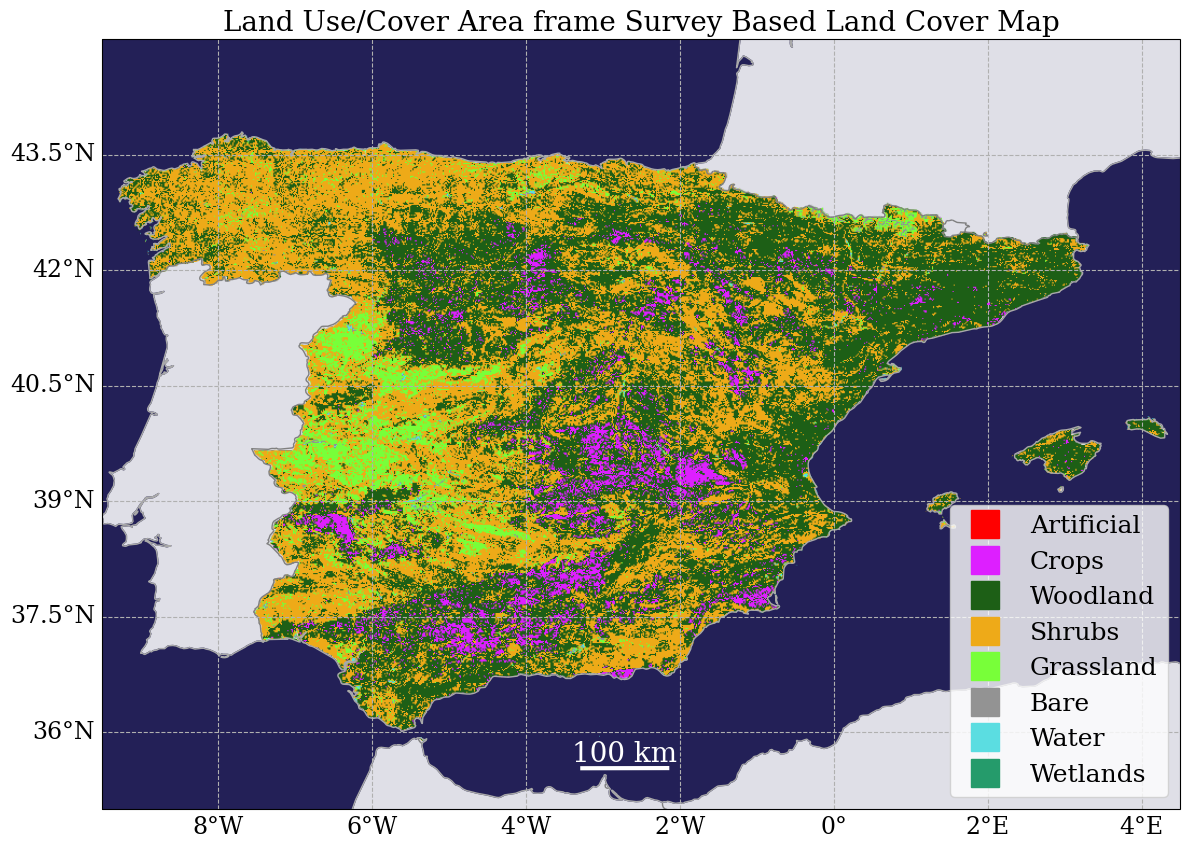

In [7]:
# this is the version that is working atm
# now create the figure using cartopy
fig = plt.figure(figsize=(15, 10))

# load env to get nicer basemaps
os.environ['CARTOPY_USER_BACKGROUNDS'] = ''

# change font
plt.rcParams['font.family'] = 'serif'
# change the scale bar

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]

zoom_region = [4.5, 35, -9.5, 45]
# plot the map over the region of interest
#### options if you want to use a basemap
#base = "SATELLITE"
#ax = cartoee.get_map(image, vis_params=landcoverPalette, zoom_level=7,region=zoom_region,basemap=base)

### change input map here
ax = cartoee.get_map(LUCAS, vis_params=landcoverPalette, region=zoom_region)

# add north arrow
ax.add_feature(cartopy.feature.LAND,color="#dfdfe7")
ax.add_feature(cartopy.feature.BORDERS,edgecolor="grey")
ax.add_feature(cartopy.feature.COASTLINE,edgecolor="darkgrey")
ax.add_feature(cartopy.feature.OCEAN,color="#232057")
#cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.18), text_color="white", arrow_color="white", fontsize=20)
# IF A GRID IS USED A NORTH ARROW IS NOT NECESSARY
# add scale bar 
### this is currently not done as the bar is skewed
cartoee.add_scale_bar_lite(ax, length=100, xy=(0.485, 0.05), fontsize=20, color="white", unit="km")

# add gridlines to the map at a specified interval
gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':17}
gl.ylabel_style = {'size':17}

ax.set_title(label="Land Use/Cover Area frame Survey Based Land Cover Map", fontsize=20)
# add legend
cartoee.add_legend(ax, legend_elements=legend, font_size=18, title="", title_fontize=12, loc='lower right')

plt.savefig('1_out_LCMaps/LUCAS.jpg', dpi=300,bbox_inches='tight')

plt.show()

show()

spatConSatCgls
spatConSatDw 
spatConSatLucas

In [20]:
# this is the version that is working atm
# now create the figure using cartopy
fig = plt.figure(figsize=(15, 10))

# load env to get nicer basemaps
os.environ['CARTOPY_USER_BACKGROUNDS'] = ''

# change font
plt.rcParams['font.family'] = 'serif'
# change the scale bar

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]

zoom_region = [4.5, 35, -9.5, 45]
# plot the map over the region of interest
#### options if you want to use a basemap
#base = "SATELLITE"
#ax = cartoee.get_map(image, vis_params=landcoverPalette, zoom_level=7,region=zoom_region,basemap=base)

### change input map here
ax = cartoee.get_map(spatCon, vis_params=mapDifPal, region=zoom_region)
title = "Spatial consistency between land cover maps based on different training data"
# add north arrow
ax.add_feature(cartopy.feature.LAND,color="#dfdfe7")
ax.add_feature(cartopy.feature.BORDERS,edgecolor="grey")
ax.add_feature(cartopy.feature.COASTLINE,edgecolor="darkgrey")
ax.add_feature(cartopy.feature.OCEAN,color="#232057")
#cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.18), text_color="white", arrow_color="white", fontsize=20)
# IF A GRID IS USED A NORTH ARROW IS NOT NECESSARY
# add scale bar 
#
cartoee.add_scale_bar_lite(ax, length=100, xy=(0.485, 0.05), fontsize=20, color="white", unit="km")

# add gridlines to the map at a specified interval
gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':17}
gl.ylabel_style = {'size':17}

ax.set_title(label=title, fontsize=18)
# add legend
cartoee.add_legend(ax, legend_elements=legendSpatCon, font_size=18, title="", title_fontize=12, loc='lower right')

plt.savefig('2_out_spatialConsistencyMaps/spatialConsistency.jpg', dpi=300,bbox_inches='tight')

plt.show()

show()

GLCent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_GLCentropy')
CGLSent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_CGLSentropy')
DWent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWentropy')
LUCASent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_LUCASentropy')
ESAent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_ESAentropy')
DWGoogent = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_DWgoogentropy')
L8entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8cglsentropy')
S1entc = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1cglsentropy')
L8entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8dwentropy')
S1entd = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1dwentropy')
L8entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_L8lucasentropy')
S1entl = ee.Image('projects/ee-zinabeathe/assets/2_DifferenceEvaluation/2_out_S1lucasentropy')

In [34]:
# this is the version that is working atm
# now create the figure using cartopy
fig = plt.figure(figsize=(15, 10))

# load env to get nicer basemaps
os.environ['CARTOPY_USER_BACKGROUNDS'] = ''

# change font
plt.rcParams['font.family'] = 'serif'
# change the scale bar

# here is the bounding box of the map extent we want to use
# formatted a [W,S,E,N]

zoom_region = [4.5, 35, -9.5, 45]
# plot the map over the region of interest
#### options if you want to use a basemap
#base = "SATELLITE"
#ax = cartoee.get_map(image, vis_params=landcoverPalette, zoom_level=7,region=zoom_region,basemap=base)

### change input map here
ax = cartoee.get_map(L8entl, vis_params=mapEntPal, region=zoom_region)
title = "Landsat 8 and LUCAS based"
# add north arrow
ax.add_feature(cartopy.feature.LAND,color="#dfdfe7")
ax.add_feature(cartopy.feature.BORDERS,edgecolor="grey")
ax.add_feature(cartopy.feature.COASTLINE,edgecolor="darkgrey")
ax.add_feature(cartopy.feature.OCEAN,color="#232057")
#cartoee.add_north_arrow(ax, text="N", xy=(0.05, 0.18), text_color="white", arrow_color="white", fontsize=20)
# IF A GRID IS USED A NORTH ARROW IS NOT NECESSARY
# add scale bar 
### this is currently not done as the bar is skewed
cartoee.add_scale_bar_lite(ax, length=100, xy=(0.485, 0.05), fontsize=20, color="white", unit="km")

# add gridlines to the map at a specified interval
gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':17}
gl.ylabel_style = {'size':17}

ax.set_title(label=title+ " Entropy Map", fontsize=22)
# add legend
cartoee.add_colorbar(ax,loc='right',vis_params=mapEntPal)

plt.savefig('2_out_entropy/Sats/l8lentropy.jpg', dpi=300,bbox_inches='tight')

plt.show()

show()